#Librerias


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import copy
#%matplotlib inline

#Principal
Aqui se maneja el codigo, se puede modificar:
  
  -Vector inicial

  -La funcion a evaluar

  -El metodo usado en el programa
  
  Eng:
  
  Here you can control the code, you can modify:
  
  -The initial Vector

  -The function to evaluate

  -The method that is used in the program

* Iteracion 1   - Vector: [0.484375 1.6875  ]   - F(V): 211.35214829444902  - TG 232.86768775422658  -GRAd [215.5999999999999, 88.0]
* Iteracion 2   - Vector: [1.03618538 1.11996841]   - F(V): 0.21556972701223237  - TG 405.28504809668794  -GRAd [282.52691650390597, -290.5761718750001]
* Iteracion 3   - Vector: [1.05485034 1.11092774]   - F(V): 0.003325937677147703  - TG 21.236944087041866  -GRAd [19.112918567070153, -9.257652942549072]
* Iteracion 4   - Vector: [1.05400914 1.11127569]   - F(V): 0.0029285758336719393  - TG 0.9321723814204537  -GRAd [-0.8613909352925475, 0.3563018457416547]
* Iteracion 5   - Vector: [1.05407848 1.11114271]   - F(V): 0.0029248577419588905  - TG 0.0767847526442847  -GRAd [0.03550352345189367, -0.06808375768966357]
* Iteracion 6   - Vector: [1.05391769 1.11111878]   - F(V): 0.002921276362748754  - TG 0.08323374590461387  -GRAd [-0.08232700254040992, -0.012252392012385371]
* Iteracion 7   - Vector: [1.0540169 1.1109718]   - F(V): 0.0029178659149214107  - TG 

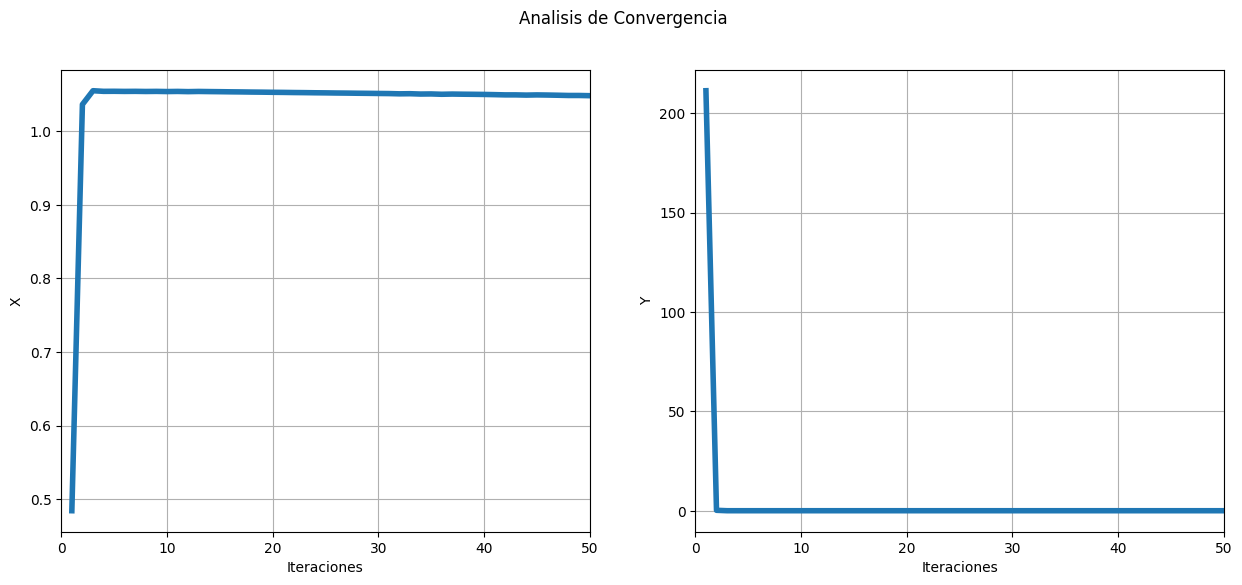

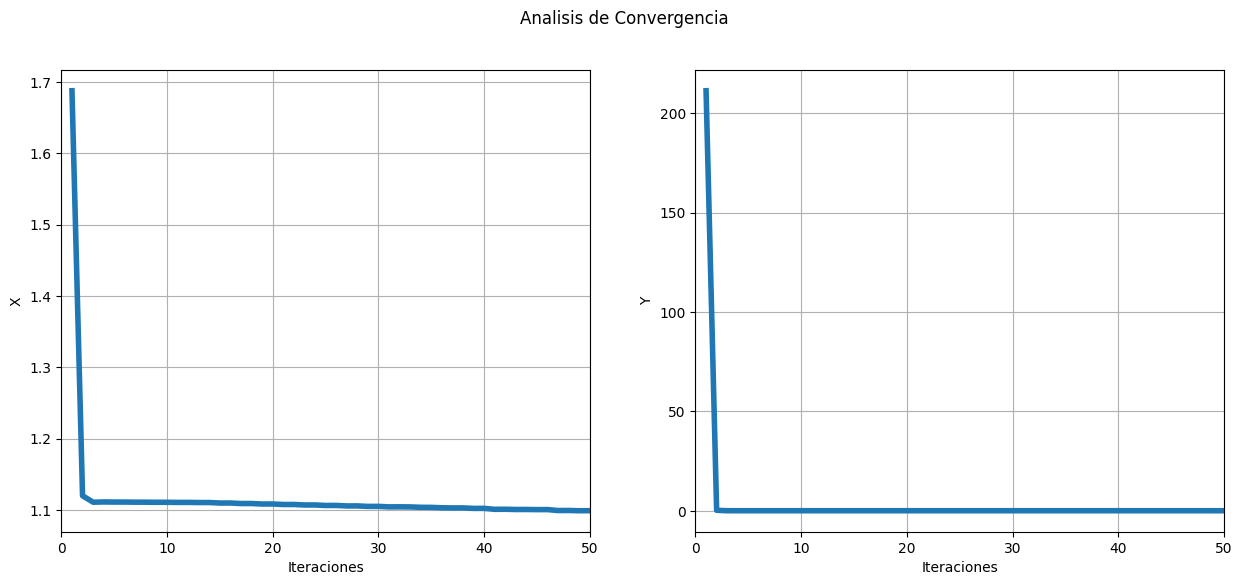

In [191]:
IterMax=50
vector=[-1.2,1]
inicial=copy.deepcopy(vector)

#Function Mod
numvar=2
x=sympy.symbols('x')
y=sympy.symbols('y')
namevar=['x','y']


f=100*(y-x**2)**2+(1-x)**2
#f=x**2-2*x*y+y**2+3*y-y*x**2

TG=100

Gradant=[0,0]

Contador=0
Registrox=[]
Registroy=[]

#Iniciamos la hesiana Ak
Hes=Hesiana(inicial)


while(TG>0.001 and Contador<IterMax):
  TG=0
  #Obtenemos los elementos anteriores
  AntGrad=copy.deepcopy(Grad)
  Mov=np.multiply(Lambda,Dis)

  #Evaluamos gradiente en el vector
  Grad=Gradiente(vector)


  MovG=np.add(Grad,np.multiply(AntGrad,-1))
  #Evaluamos la Hesiana del Vector
  if(Contador!=0):
    Hes=BFGS(Hes,MovG,Mov)
    #Hes=DFP(Hes,MovG,Mov)

  #Evaluamos si es definida positiva
  while(Positiva(Hes)==False):
    #Si no aumentamos con perturbacion
    for i in range(numvar):
        Hes[i][i]=Hes[i][i]+0.1
        #Hes[i][i]=Hes[i][i]+0.1*(3**Contador)

  #Checamos si esta bien condicionada
  Cond=np.linalg.cond(Hes)
  if(Cond-1<0.5):
    #Resolvemos el sistema de ecuaciones y la distancia sera la solucion al sistema
    Dis=np.linalg.solve(Hes,Grad)
  #Si no, entonces su distancia sera el Gradiente
  else:
    Dis=copy.deepcopy(Grad)



  #Obtenemos el paso
  Lambda=Paso(Grad,vector)

  #Actualizamos a X
  vector=np.add(vector,np.multiply(Lambda,Dis))

  #Obtenemos el evaluado del vector
  Fev=f
  for i in range(0,numvar):
    Fev=Fev.subs(namevar[i],vector[i])


  TF=float(Fev)

  #Obtenemos la norma del gradiente
  for i in range(0,numvar):
    TG+=Grad[i]**2

  TG=np.sqrt(TG)

  #Agregamos a registro
  Contador+=1
  Registrox.append([Contador,vector[0],TF])
  Registroy.append([Contador,vector[1],TF])

  print("* Iteracion",Contador,"  - Vector:",vector,"  - F(V):",float(TF)," - TG",TG, " -GRAd", Grad)

Evaluacion(Registrox)
Evaluacion(Registroy)

#Gradiente y Hesiana

In [46]:
def Gradiente(vector):

    grad=[]
    #Creacion Gradiente
    for i in range (0,numvar):
        g=-1*sympy.diff(f,namevar[i])
        grad.append(g)

    #evaluacion del gradiente en los puntos
    for i in range(0,numvar):
      for j in range(0,numvar):
        grad[i]=grad[i].subs(namevar[j],vector[j])
    #convertir a float
    for i in range(0,numvar):
      grad[i]=float(grad[i])


    return grad

In [190]:
def Hesiana(Vector):
  H=sympy.hessian(f,namevar)
  for i in range(0,numvar):
    H=H.subs(namevar[i],vector[i])
  Hes=np.array(H).astype(float)

  return(Hes)

#Paso

In [5]:
def Paso(Grad,Vector):
#if(True):
  Lambda=1
  a=0.0001
  b=0.1

  while(Function(np.add(Vector,np.multiply(Grad,Lambda)))>(Function(Vector)+a*Lambda*np.matmul(Grad,Grad)) and b*np.matmul(Grad,Grad)>np.matmul(Gradiente(np.add(Vector,np.multiply(Lambda,Grad))),Grad)):
    Lambda=0.5*Lambda

  return Lambda

#Operaciones

In [8]:
def MultMatriz(vectora,vectorb):
  auxa=[]
  auxb=[]


  for i in range(len(vectora)):
    auxa.append([vectora[i]])

  auxb.append(vectorb)

  Matriz=np.dot(auxa,auxb)

  return Matriz

#Evaluaciones

In [189]:
def Positiva(Hes):
  Aux=np.multiply(Hes,1.0)

  for i in range(len(Hes[0])):
    Pivote=Aux[i][i]
    if(Pivote<=0):
      return False
    for j in range(i+1,len(Hes[0])):
      Divid=Aux[j][i]/Pivote
      AuxVector=np.multiply(-1*Divid,Aux[i])
      Aux[j]=np.add(Aux[j],AuxVector)
  return True

In [4]:
def Function(Vector):
  Fe=f
  for i in range(0,numvar):
    Fe=Fe.subs(namevar[i],Vector[i])

  Fe=float(Fe)
  return Fe

In [6]:
#Evalua los registros dados de los metodos
def Evaluacion(Registro):
  #Conversion para facilitar la graficacion
  Registro=np.array(Registro)

  fig, axs=plt.subplots(1,2,figsize=(15,6))
  #Ponemos titulo
  fig.suptitle('Analisis de Convergencia')
  #Primera Grafica
  axs[0].plot(Registro[:,0],Registro[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('X')
  axs[0].grid()
  axs[0].set_xlim([0,len(Registro)])
  #Segunda Grafica
  axs[1].plot(Registro[:,0],Registro[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Y')
  axs[1].grid()
  axs[1].set_xlim([0,len(Registro)])
  #Mostramos las graficas
  plt.show()

#Metodos

In [192]:
#Estacionario
def Estacionario():
  #Evaluamos la Hesiana del Vector
  Hes=Hesiana(inicial)
  return Hes

In [172]:
#BFGS
def BFGS(Hesiana,yk,dk):
  div1=np.matmul(yk,dk)
  div2=np.matmul(dk,np.matmul(Hesiana,dk))


  up1=MultMatriz(yk,yk)
  up2=np.matmul(Hesiana,np.matmul(MultMatriz(dk,dk),Hesiana))

  Plus1=np.multiply((1/div1),up1)
  Plus2=np.multiply((-1/div2),up2)

  NewHes=np.add(np.add(Hesiana,Plus1),Plus2)

  return NewHes

In [173]:
#DFP
def DFP(Hesiana,yk,dk):
  div12=np.matmul(yk,dk)
  div3=np.matmul(dk,np.matmul(Hesiana,dk))

  up1=MultMatriz(np.add(yk,np.multiply(-1,np.matmul(Hesiana,dk))),yk)
  up2=MultMatriz(yk,np.add(yk,np.multiply(-1,np.matmul(Hesiana,dk))))
  up3=np.matmul(Hesiana,np.matmul(MultMatriz(dk,dk),Hesiana))

  Plus1=np.multiply((1/div12),up1)
  Plus2=np.multiply((1/div12),up2)
  Plus3=np.multiply((-1/div3),up3)


  NewHes=np.add(np.add(np.add(Hesiana,Plus1),Plus2),Plus3)
  return NewHes